# Your first embedding

## Exercise objectives:

- Run your first RNN for NLP
- Get a first taste of what an embedding is

<hr>

Words are not something you can easily feed to a Neural Network. For this reason, we have to convert them to something more meaningful. 

And this is exactly what _Embeddings_ are for! They map any word onto a vectorial representation (this a fancy way to represent each word with a vector ;) ). For instance, the word `dog` can be represented by the vector $(w_1, w_2, ..., w_n)$ in the embedding space, and we will learn the weights $(w_k)_k$.

So let's just do it.

# The data

❓ **Question** ❓ Let's first load the data. You don't have to understand what is going on in the function, it does not matter here.

⚠️ **Warning** ⚠️ The `load_data` function has a `percentage_of_sentences` argument. Depending on your computer, there are chances that too many sentences will make your compute slow down, or even freeze - your RAM can overflow. For that reason, **you should start with 10% of the sentences** and see if your computer handles it. Otherwise, rerun with a lower number. 

⚠️ **DISCLAIMER** ⚠️ **No need to play _who has the biggest_ (RAM) !** The idea is to get to run your models quickly to prototype. Even in real life, it is recommended that you start with a subset of your data to loop and debug quickly. So increase the number only if you are into getting the best accuracy. 

In [1]:
###########################################
### Just run this cell to load the data ###
###########################################

import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import text_to_word_sequence

def load_data(percentage_of_sentences=None):
    train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], batch_size=-1, as_supervised=True)

    train_sentences, y_train = tfds.as_numpy(train_data)
    test_sentences, y_test = tfds.as_numpy(test_data)

    # Take only a given percentage of the entire data
    if percentage_of_sentences is not None:
        assert(percentage_of_sentences> 0 and percentage_of_sentences<=100)

        len_train = int(percentage_of_sentences/100*len(train_sentences))
        train_sentences, y_train = train_sentences[:len_train], y_train[:len_train]

        len_test = int(percentage_of_sentences/100*len(test_sentences))
        test_sentences, y_test = test_sentences[:len_test], y_test[:len_test]

    X_train = [text_to_word_sequence(_.decode("utf-8")) for _ in train_sentences]
    X_test = [text_to_word_sequence(_.decode("utf-8")) for _ in test_sentences]

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_data(percentage_of_sentences=10)


2023-11-16 10:58:40.136736: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-11-16 10:58:44.394356: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Co

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHIF67Q/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHIF67Q/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHIF67Q/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


Now that you have loaded the data, let's check it out!

❓ **Question** ❓ You can play with the data here. In particular, `X_train` and `X_test` are lists of sentences. Let's print some of them, with their respective label stored in `y_train` and `y_test`.

In [3]:
# YOUR CODE HERE
# Print the first 10 sentences of the training set, one at a time (use a for loop).
# And their labels

for i in range(10):
    print(X_train[i])
    print(y_train[i])
    print()


['this', 'was', 'an', 'absolutely', 'terrible', 'movie', "don't", 'be', 'lured', 'in', 'by', 'christopher', 'walken', 'or', 'michael', 'ironside', 'both', 'are', 'great', 'actors', 'but', 'this', 'must', 'simply', 'be', 'their', 'worst', 'role', 'in', 'history', 'even', 'their', 'great', 'acting', 'could', 'not', 'redeem', 'this', "movie's", 'ridiculous', 'storyline', 'this', 'movie', 'is', 'an', 'early', 'nineties', 'us', 'propaganda', 'piece', 'the', 'most', 'pathetic', 'scenes', 'were', 'those', 'when', 'the', 'columbian', 'rebels', 'were', 'making', 'their', 'cases', 'for', 'revolutions', 'maria', 'conchita', 'alonso', 'appeared', 'phony', 'and', 'her', 'pseudo', 'love', 'affair', 'with', 'walken', 'was', 'nothing', 'but', 'a', 'pathetic', 'emotional', 'plug', 'in', 'a', 'movie', 'that', 'was', 'devoid', 'of', 'any', 'real', 'meaning', 'i', 'am', 'disappointed', 'that', 'there', 'are', 'movies', 'like', 'this', 'ruining', "actor's", 'like', 'christopher', "walken's", 'good', 'name'

**LABELS**: the task is a binary classification problem:
- label 0️⃣ corresponds to a <font color=red>negative</font> movie review
- label 1️⃣ corresponds to a <font color=green>positive</font> movie review

**INPUTS**: 
- 🧹 The data has been partially cleaned! So you don't have to worry about it in this exercise. 
- ❗️ But don't forget this step in real-life challenges. 

Remember that words are not computer-compatible materials? You have to tokenize them!

❓ **Question** ❓ Run the following cell to tokenize your sentences

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

# This initializes a Keras utilities that does all the tokenization for you
tokenizer = Tokenizer()

# The tokenization learns a dictionary that maps a token (integer) to each word
# It can be done only on the train set - we are not supposed to know the test set!
# This tokenization also lowercases your words, apply some filters, and so on - you can check the doc if you want
tokenizer.fit_on_texts(X_train)

# We apply the tokenization to the train and test set
X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)


❓ **Question** ❓ Print some of the tokenized sentences to be sure you got what you expected

In [5]:
# YOUR CODE HERE
# Print some of the tokenized sentences of the training set, one at a time (use a for loop).

for i in range(10):
    print(X_train_token[i])
    print()


[11, 13, 33, 422, 402, 18, 91, 27, 6893, 8, 31, 1311, 4504, 39, 539, 8007, 194, 24, 75, 161, 17, 11, 228, 336, 27, 68, 252, 203, 8, 468, 58, 68, 75, 108, 98, 21, 4165, 11, 1418, 694, 695, 11, 18, 6, 33, 389, 6065, 204, 2345, 487, 1, 86, 928, 140, 69, 158, 51, 1, 16730, 8008, 69, 251, 68, 2895, 15, 16731, 1877, 12117, 12118, 1344, 4505, 3, 38, 3640, 120, 1386, 16, 4504, 13, 164, 17, 2, 928, 805, 8009, 8, 2, 18, 12, 13, 3231, 4, 99, 142, 1239, 9, 221, 696, 12, 48, 24, 97, 35, 11, 8010, 4506, 35, 1311, 16732, 49, 375, 9, 98, 1006, 753, 137, 10]

[9, 25, 76, 572, 5, 730, 1945, 296, 100, 17, 11, 6, 625, 662, 5, 2, 1835, 4, 190, 555, 61, 1170, 115, 2531, 3, 2896, 20, 1, 9585, 3, 264, 40, 5424, 2, 187, 200, 20, 11, 3435, 9, 1387, 1945, 80, 1, 19, 13, 1601, 1, 103, 1056, 13, 2090, 1646, 515, 3, 319, 190, 443, 5, 531, 17, 16, 53, 1878, 4, 46, 13, 4507, 94, 39, 135, 9, 929, 9, 195, 25, 1007, 170, 4, 1, 19, 17, 9, 262, 1, 2532, 4, 10, 3, 273, 40, 443, 5, 531, 4, 96, 181, 9586, 213, 99, 142, 4508,

The dictionary that maps each word to a token can be accessed with `tokenizer.word_index`
    
❓ **Question** ❓ Add a `vocab_size` variable that stores the number of different words (=tokens) in the train set. This is called the _size of the vocabulary_.

In [6]:
# YOUR CODE HERE
# Add a vocab_size variable that contains the size of the vocabulary (the number of unique words in the train set)

vocab_size = len(tokenizer.word_index) + 1

print(vocab_size)


30420


Your `X_train_token` and `X_test_token` contain sequences of different lengths.

<img src="padding.png" alt='Word2Vec' width="700px" />

However, a neural network has to have a tensor as input. For this reason, you have to pad your data.

❓ **Question** ❓  Pad your data with the `pad_sequences` function (documentation [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences)). Do not forget about the `dtype` and `padding` keywords (but do not use `maxlen` here).

In [7]:
# YOUR CODE HERE
# Pad the train and test set to have the same length (use the pad_sequences function from Keras)

from tensorflow.keras.preprocessing.sequence import pad_sequences

X_pad = pad_sequences(X_train_token, dtype='float32', padding='pre')

# Print the first sentence of the train set, before and after padding

print(X_train_token[0])
print(X_pad[0])


[11, 13, 33, 422, 402, 18, 91, 27, 6893, 8, 31, 1311, 4504, 39, 539, 8007, 194, 24, 75, 161, 17, 11, 228, 336, 27, 68, 252, 203, 8, 468, 58, 68, 75, 108, 98, 21, 4165, 11, 1418, 694, 695, 11, 18, 6, 33, 389, 6065, 204, 2345, 487, 1, 86, 928, 140, 69, 158, 51, 1, 16730, 8008, 69, 251, 68, 2895, 15, 16731, 1877, 12117, 12118, 1344, 4505, 3, 38, 3640, 120, 1386, 16, 4504, 13, 164, 17, 2, 928, 805, 8009, 8, 2, 18, 12, 13, 3231, 4, 99, 142, 1239, 9, 221, 696, 12, 48, 24, 97, 35, 11, 8010, 4506, 35, 1311, 16732, 49, 375, 9, 98, 1006, 753, 137, 10]
[  0.   0.   0. ... 753. 137.  10.]


# The RNN

Let's now feed this data to a Recurrent Neural Network.

❓ **Question** ❓ Write a model that has:
- an embedding layer whose `input_dim` is the size of your vocabulary (= your `vocab_size`), and whose `output_dim` is the size of the embedding space you want to have
- a RNN (SimpleRNN, LSTM, GRU) layer
- a Dense layer
- an output layer

⚠️ **Warning** ⚠️ Here, you don't need a masking layer. Why? Because `layers.Embedding` has a argument to do that directly, which you have to set with `mask_zero=True`. That also means that your data **HAS TO** be padded with **0** (which is the default behavior). See the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding#example_2) to understand how it **impacts** the `input_dim`.

<details>
    <summary>💡 Hint</summary>

`input_dim` should equal size of vocabulary + 1

</details>

Compile it with the appropriate arguments

In [8]:
# YOUR CODE HERE
# Create a model with
# an Embedding layer whose input_dim is the vocab_size variable,
# and whose output_dim is the embedding_size variable
# a RNN layer (SimpleRNN or LSTM or GRU) with 32 units
# a Dense layer and
# a final sigmoid layer

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

embedding_size = 32

model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size))

model.add(SimpleRNN(units=32))

model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))


❓ **Question** ❓ Look at the number of parameters in your RNN. 

In [9]:
# YOUR CODE HERE
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          973440    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 976065 (3.72 MB)
Trainable params: 976065 (3.72 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


❓ Double-check that the number of parameters in your embedding layer is equal to the (number of words in your vocabulary + 1 for the masking value) $\times$  the dimension of your embedding.

In [10]:
# YOUR CODE HERE
# What is the number of parameters of the Embedding layer?

"""The number of parameters of the Embedding layer is vocab_size * embedding_size.

The Embedding layer is a lookup table that maps each word to a vector of size embedding_size.
"""


'The number of parameters of the Embedding layer is vocab_size * embedding_size.\n\nThe Embedding layer is a lookup table that maps each word to a vector of size embedding_size.\n'

❓ **Question** ❓ Start fitting your model with 20 epochs, with an early stopping criterion whose patience is equal to 4.

⚠️ **Warning** ⚠️ You might see that it takes a lot of time! 

**So stop it after a couple of iterations!**

In [11]:
# YOUR CODE HERE
# Fit the model with 20 epochs with early stopping and patience of 4

from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer="adam", loss="binary_crossentropy",
              metrics=["accuracy"])

early_stopping = EarlyStopping(patience=4)

model.fit(X_pad, y_train, epochs=20, validation_split=0.2,
          callbacks=[early_stopping])


Epoch 1/20
63/63 [==============================] - 12s 177ms/step - loss: 0.6947 - accuracy: 0.5105 - val_loss: 0.6953 - val_accuracy: 0.4860
Epoch 2/20
63/63 [==============================] - 11s 174ms/step - loss: 0.6362 - accuracy: 0.7560 - val_loss: 0.6776 - val_accuracy: 0.5500
Epoch 3/20
63/63 [==============================] - 11s 176ms/step - loss: 0.3471 - accuracy: 0.9370 - val_loss: 0.6067 - val_accuracy: 0.6600
Epoch 4/20
63/63 [==============================] - 11s 176ms/step - loss: 0.0525 - accuracy: 0.9960 - val_loss: 0.8034 - val_accuracy: 0.6080
Epoch 5/20
63/63 [==============================] - 11s 175ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.8414 - val_accuracy: 0.6380
Epoch 6/20
63/63 [==============================] - 11s 179ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.9396 - val_accuracy: 0.6360
Epoch 7/20
63/63 [==============================] - 11s 172ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.0178 - val_accuracy: 0.6280

Let's not waste too much time just staring at our screen or having coffees. It is too early to start having breaks ;)

❓ **Question** ❓ We will reduce the computational time. To start, let's first look at how many words there are in the different sentences of your train set (Just run the following cell).

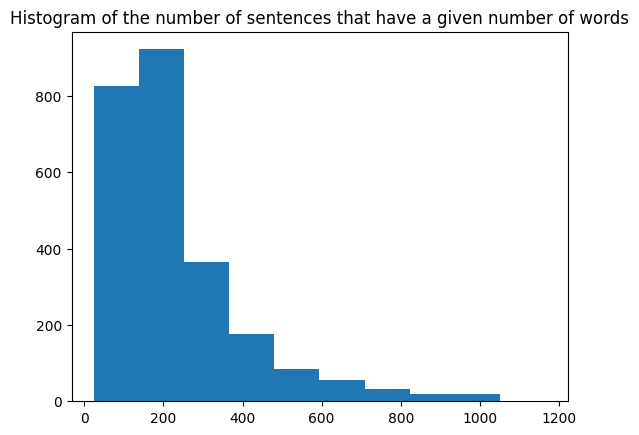

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_hist(X):
    len_ = [len(_) for _ in X]
    plt.hist(len_)
    plt.title('Histogram of the number of sentences that have a given number of words')
    plt.show()

plot_hist(X_train)


You will probably see that 90 to 95% of your sentences have less than 300 words. And very few have more than 1000.

However, as you didn't use `maxlen` in your padding above, your input tensor has a dimension equal to the length of the sentence that has the maximum number of words.

Now, let's look at how this affects the padding: 


<img src="tensor_size.png" alt='Word2Vec' width="700px" />

Because of a few of very long sentences, one dimension of your tensor is equal to around 1000. However, most of the sentences with ~200 words have just padded values that are useless.

So your tensor is mostly useless information, which still adds time to the training process.

But what if you pad the data to a maximum length (`maxlen`) of say 200 (words)?
- First, that would increase the convergence and you would not need to stare at your screen while waiting for the algorithm to converge
- But in essence, do you really lose that much information? Do you think that you often need more than 200 words (up to 1000) to tell whether or not a sentence is positive of negative?

❓ **Question** ❓ For all these reasons, re-do your padding using the `maxlen` keyword and retrain the model!  See how much faster it is now - without hurting the performance ;)

In [13]:
# YOUR CODE HERE
# Re-train the model with maxlen = 200

maxlen = 200

X_pad = pad_sequences(X_train_token, dtype="float32",
                      padding="pre", maxlen=maxlen)

model = Sequential()

model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_size))

model.add(SimpleRNN(units=32))

model.add(Dense(units=16, activation="relu"))

model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

early_stopping = EarlyStopping(patience=4)

model.fit(X_pad, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/20
63/63 [==============================] - 3s 36ms/step - loss: 0.6982 - accuracy: 0.4775 - val_loss: 0.6898 - val_accuracy: 0.5300
Epoch 2/20
63/63 [==============================] - 2s 29ms/step - loss: 0.6339 - accuracy: 0.6795 - val_loss: 0.6813 - val_accuracy: 0.5740
Epoch 3/20
63/63 [==============================] - 2s 35ms/step - loss: 0.3563 - accuracy: 0.8835 - val_loss: 0.7241 - val_accuracy: 0.5780
Epoch 4/20
63/63 [==============================] - 2s 32ms/step - loss: 0.0602 - accuracy: 0.9950 - val_loss: 0.9792 - val_accuracy: 0.5720
Epoch 5/20
63/63 [==============================] - 2s 29ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 1.0990 - val_accuracy: 0.5800
Epoch 6/20
63/63 [==============================] - 2s 32ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.1970 - val_accuracy: 0.5840


🏁 Nice, you are now able to use `Tokenizer` and `pad_sequences`

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!